<a href="https://colab.research.google.com/github/cweeks1/final-project-cda340/blob/main/FinalProjectTitanic_Caleb_and_Josue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Random Forest
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree
#KNN
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
#Logisitc Regression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression


from google.colab import drive

drive.mount('/content/drive')

train = "/content/drive/My Drive/Colab Notebooks/data/titanic data/train.csv"
# Load the CSV file into a Pandas DataFrame first
df = pd.read_csv(train)

#renamed and cleaned the data frame
train_clean = df.dropna(subset=['Age', 'Embarked'])

train_clean

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
#converting to binary values
train_clean['Sex'] = train_clean['Sex'].map({'female': 1, 'male': 0})
#converting to numeric values
train_clean['Embarked'] = train_clean['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})


# Remove rows with missing values from both X and y *before* splitting
# This ensures that X and y have consistent indices
train_clean = train_clean.dropna(subset=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'])
X = train_clean[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = train_clean['Survived']


<ipython-input-15-1fd9f1ad814a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_clean['Sex'] = train_clean['Sex'].map({'female': 1, 'male': 0})
<ipython-input-15-1fd9f1ad814a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_clean['Embarked'] = train_clean['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})


In [ ]:
#KNN Model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Now, proceed with scaling and fitting the KNN model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # Fit and transform on training data
X_test_scaled = scaler.transform(X_test) # Only transform test data using the statistics learned from the train data

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_scaled, y_train)

predictions = knn.predict(X_test_scaled)

print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
print("\nClassification Report:\n", classification_report(y_test, predictions))

Confusion Matrix:
 [[61 19]
 [17 46]]

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.76      0.77        80
           1       0.71      0.73      0.72        63

    accuracy                           0.75       143
   macro avg       0.74      0.75      0.75       143
weighted avg       0.75      0.75      0.75       143



Best k value: 8
Best k based on recall: 8


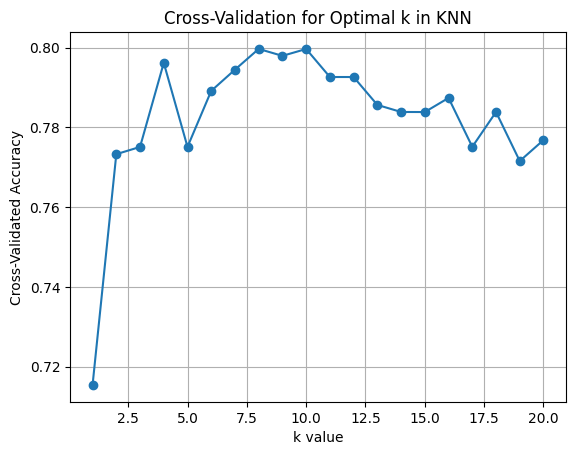

In [ ]:
#cross-validation
from sklearn.model_selection import cross_val_score

# Test different values of k
k_values = range(1, 21)
accuracy_scores = []
#recall_scores = []
#precision_scores = []

for k in k_values:
    knn_cv = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_cv, X_train_scaled, y_train, cv=5)  # 5-fold cross-validation
    accuracy_scores.append(scores.mean())

    #scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='precision').mean()
    #precision_scores.append(score)

    #scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='recall').mean()
    #recall_scores.append(score)

# Find the best k
best_k = k_values[accuracy_scores.index(max(accuracy_scores))]
#best_k = k_values[precision_scores.index(max(precision_scores))]
#best_k = k_values[recall_scores.index(max(recall_scores))]


print(f"Best k value: {best_k}")

best_k = k_values[accuracy_scores.index(max(accuracy_scores))]
print(f"Best k based on recall: {best_k}")


# Plot accuracy scores
plt.plot(k_values, accuracy_scores, marker='o')
#plt.plot(k_values, precision_scores, marker='o')
#plt.plot(k_values, recall_scores, marker='o')

plt.xlabel('k value')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Cross-Validation for Optimal k in KNN')
plt.grid()
plt.show()

In [ ]:
#KNN Model: Final Model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Now, proceed with scaling and fitting the KNN model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # Fit and transform on training data
X_test_scaled = scaler.transform(X_test) # Only transform test data using the statistics learned from the train data

#original was at 1 with 78%, an increase of 5% when switched to 83%
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train_scaled, y_train)

predictions = knn.predict(X_test_scaled)

print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
print("\nClassification Report:\n", classification_report(y_test, predictions))

Confusion Matrix:
 [[72  8]
 [20 43]]

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.90      0.84        80
           1       0.84      0.68      0.75        63

    accuracy                           0.80       143
   macro avg       0.81      0.79      0.80       143
weighted avg       0.81      0.80      0.80       143



In [ ]:
#Logistic Regression Model
X = train_clean[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = train_clean['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_model = LogisticRegression()
log_model.fit(X_train, y_train)

threshold = 0.5

y_prob = log_model.predict_proba(X_test)[:, 1]  # Probability of class 1
y_pred = (y_prob >= threshold).astype(int)



print(f"Classification Report (Threshold = {threshold}):")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report (Threshold = 0.5):
              precision    recall  f1-score   support

           0       0.77      0.91      0.83        80
           1       0.85      0.65      0.74        63

    accuracy                           0.80       143
   macro avg       0.81      0.78      0.79       143
weighted avg       0.81      0.80      0.79       143

Confusion Matrix:
[[73  7]
 [22 41]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


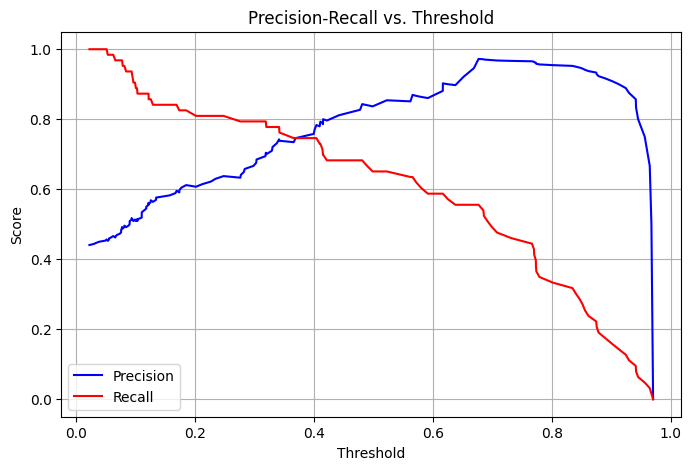

In [ ]:
# Compute precision-recall values for different thresholds
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Plot Precision-Recall vs. Threshold
plt.figure(figsize=(8, 5))
plt.plot(thresholds, precision[:-1], label="Precision", color="blue")
plt.plot(thresholds, recall[:-1], label="Recall", color="red")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall vs. Threshold")
plt.legend()
plt.grid()
plt.show()

In [ ]:
#Random Forest Model: Default
X = train_clean[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = train_clean['Survived']

# Proceed with train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42, oob_score=True)
rf.fit(X_train, y_train)
rf.fit(X, y)
print(rf.oob_score_)

y_pred = rf.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

0.7935393258426966
Confusion Matrix:
[[79  1]
 [ 6 57]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96        80
           1       0.98      0.90      0.94        63

    accuracy                           0.95       143
   macro avg       0.96      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143



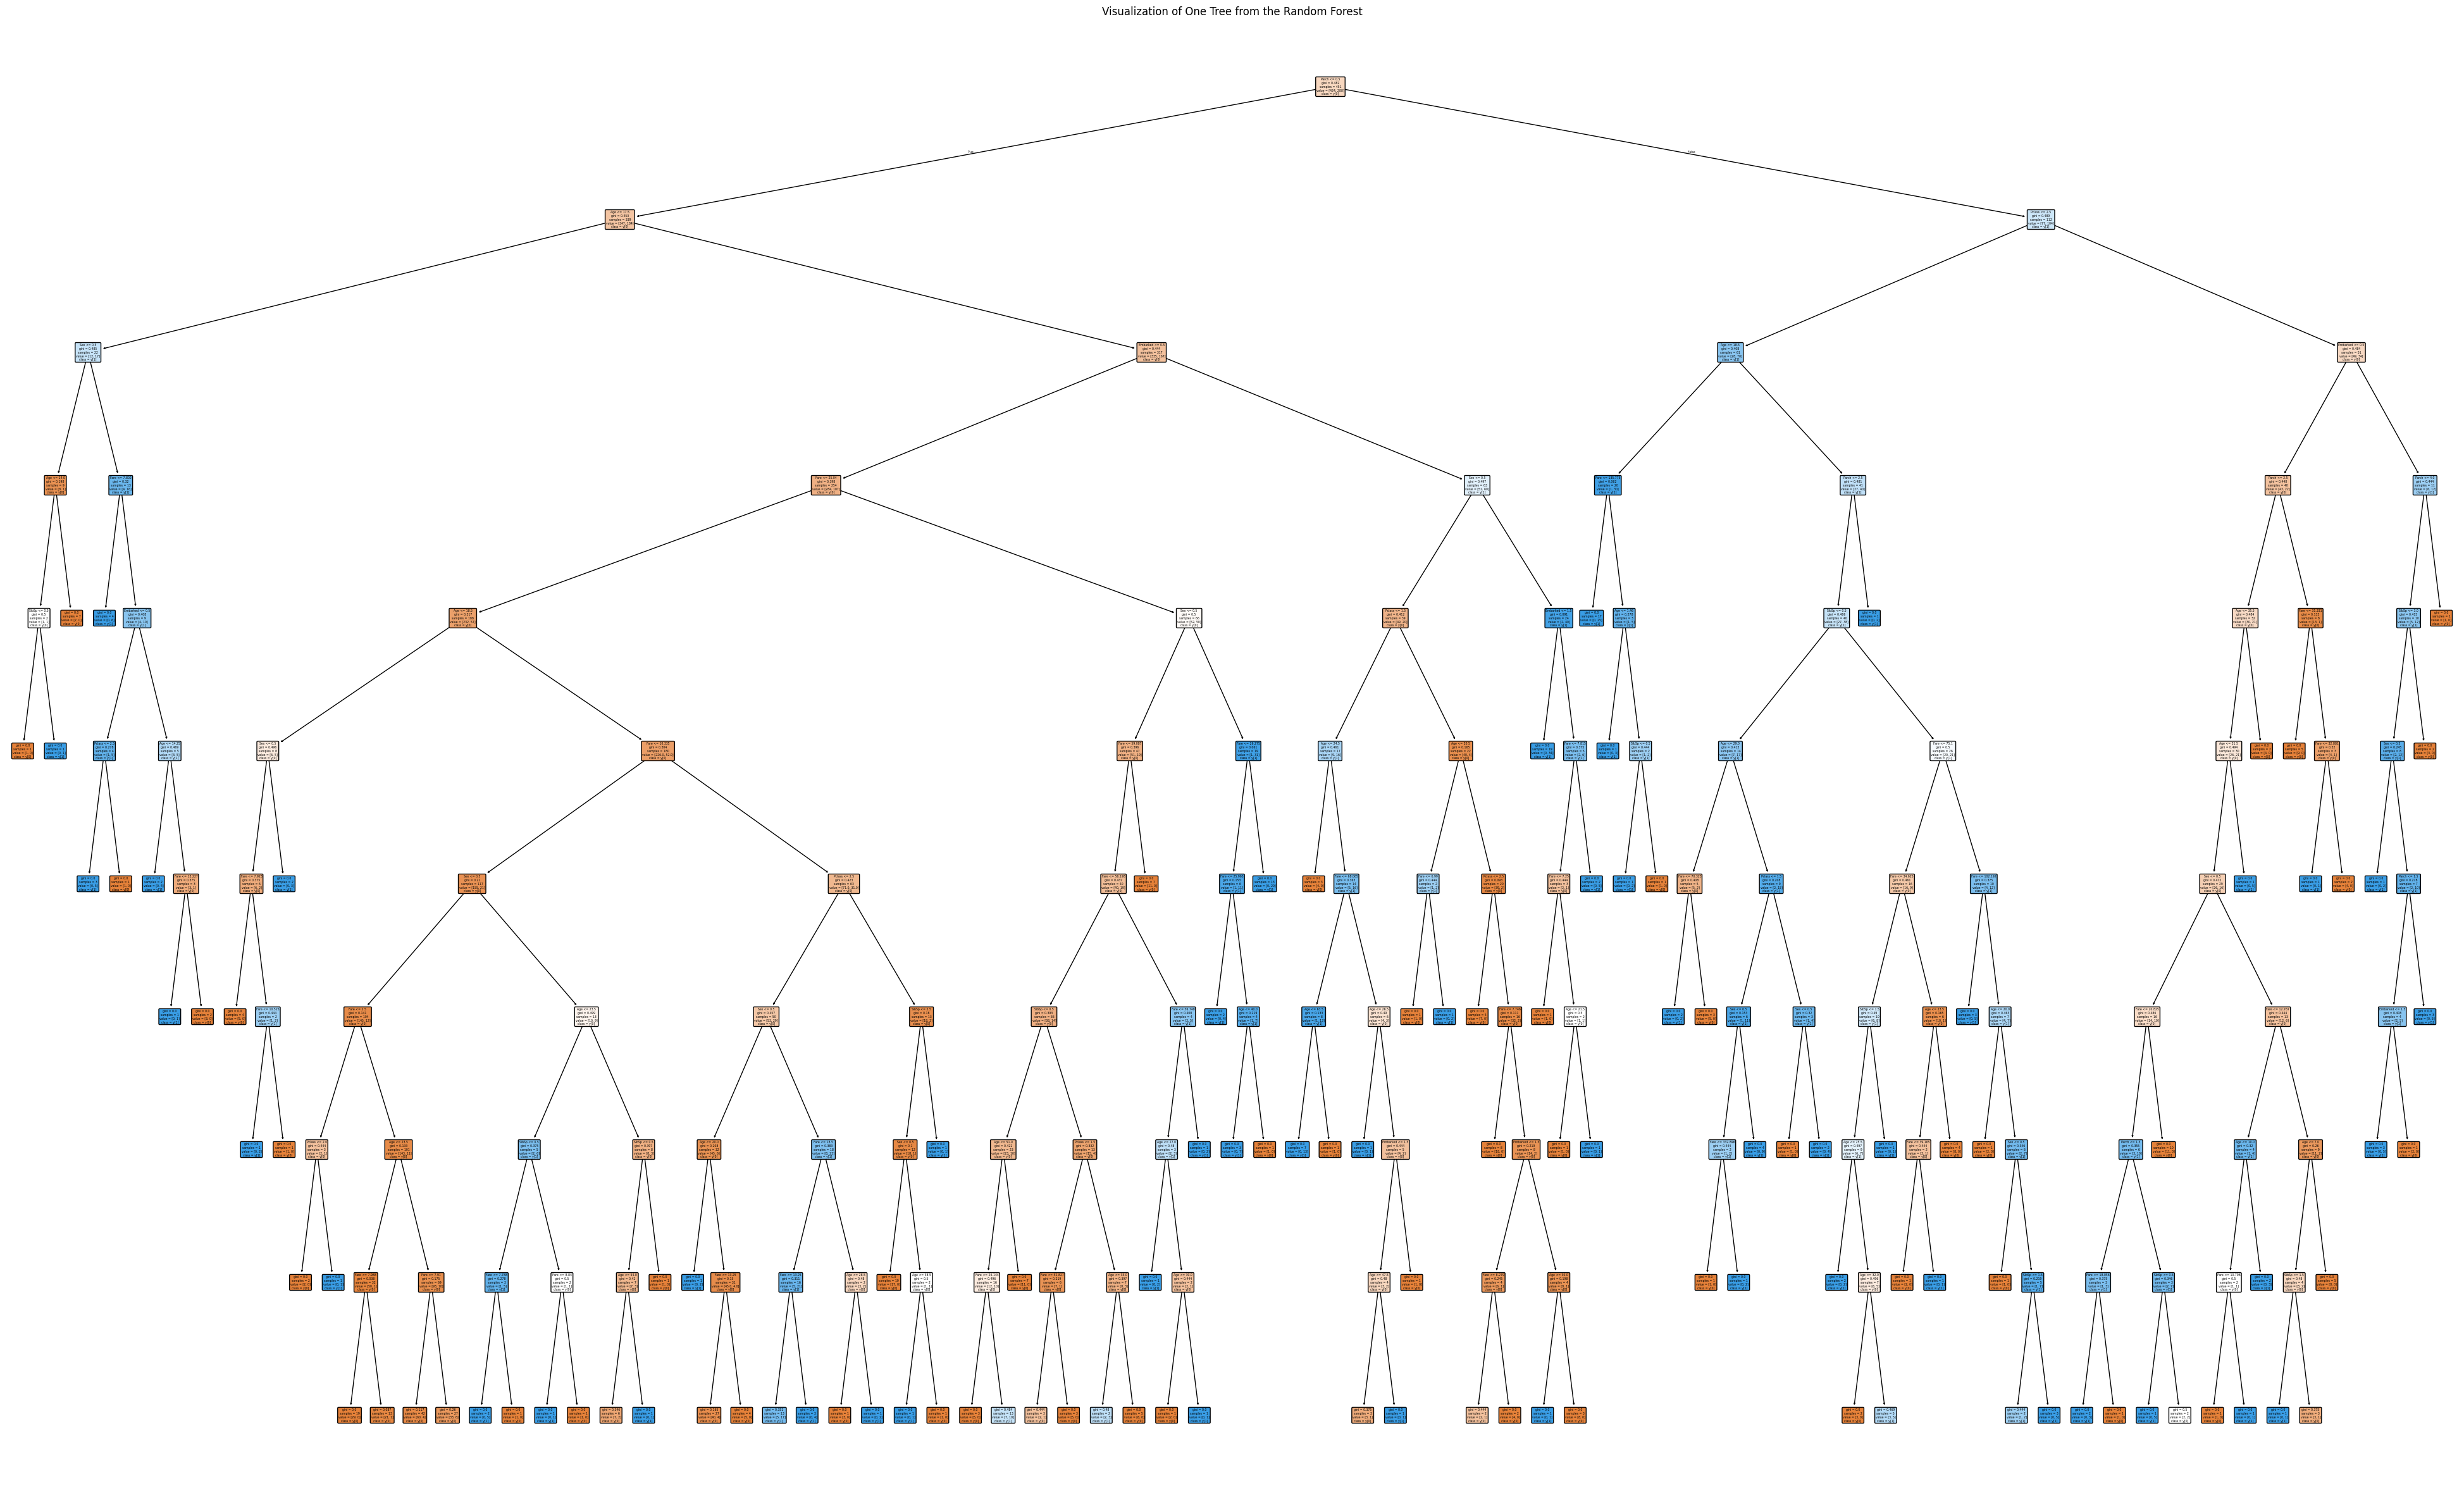

In [ ]:
plt.figure(figsize=(50, 30))
tree.plot_tree(rf.estimators_[0],
               filled=True,
               feature_names=X.columns,
               class_names=True,
               rounded=True)
plt.title("Visualization of One Tree from the Random Forest")
plt.show()

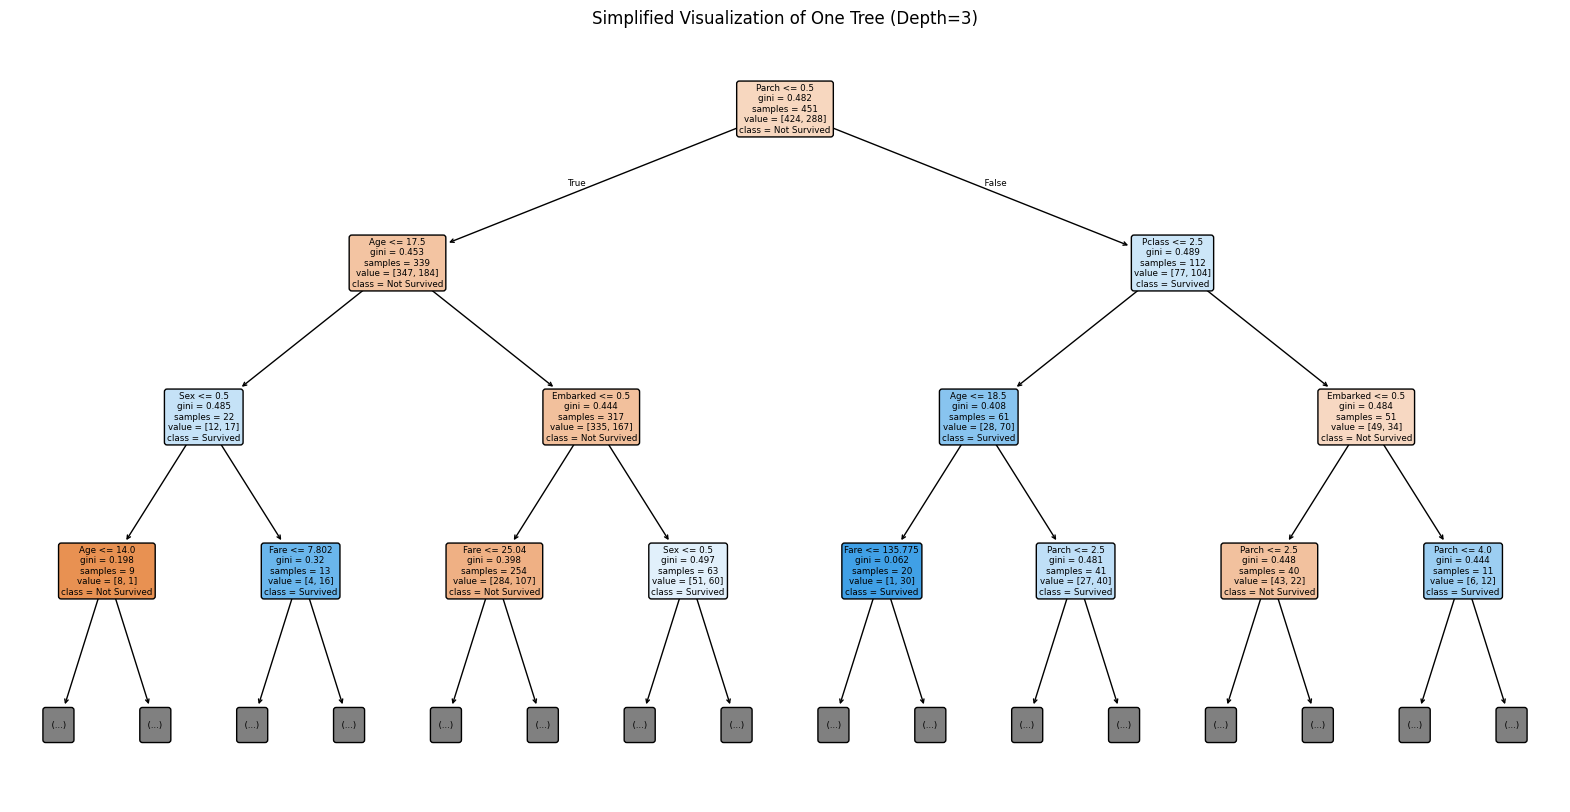

In [ ]:
plt.figure(figsize=(20, 10))  # Adjust figure size as needed
plot_tree(rf.estimators_[0],
          filled=True,
          feature_names=X.columns,
          class_names=['Not Survived', 'Survived'],  # Adjust class names if needed
          rounded=True,
          max_depth=3)  # Limit depth for readability
plt.title("Simplified Visualization of One Tree (Depth=3)")
plt.show()

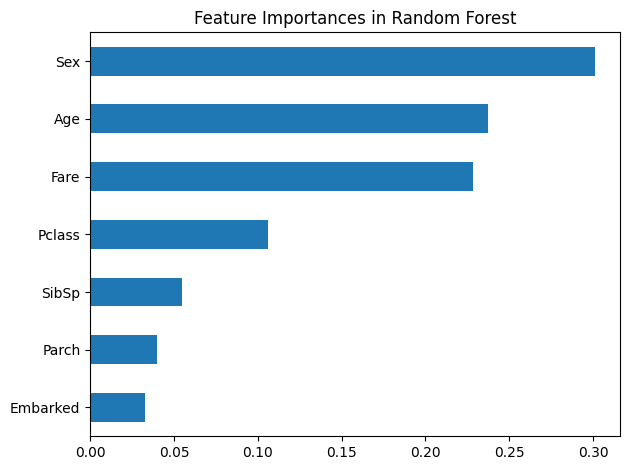

In [ ]:
#Random Forest: Feature Importance
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
feature_importances.sort_values().plot(kind='barh')
plt.title("Feature Importances in Random Forest")
plt.tight_layout()
plt.show()

In [ ]:
#Random Forest: Feature Selection
from sklearn.feature_selection import RFECV

rf = RandomForestClassifier(n_estimators=50, random_state=42)
rfecv = RFECV(estimator=rf, step=1, cv=5, scoring='accuracy') #scoring can be changed to 'precision', 'recall', or 'f1'
rfecv.fit(X_train, y_train)

print("Optimal number of features:", rfecv.n_features_)
print("Selected features:", X_train.columns[rfecv.support_])

Optimal number of features: 4
Selected features: Index(['Pclass', 'Sex', 'Age', 'Fare'], dtype='object')


In [ ]:
#Random Forest: Hyperparameter Selection
from sklearn.model_selection import GridSearchCV

params = {'n_estimators': [10, 15, 20], 'max_depth': [3, 5, 10]}
gs = GridSearchCV(RandomForestClassifier(), param_grid=params, cv=5)
gs.fit(X_train, y_train)
print(gs.best_params_)

{'max_depth': 5, 'n_estimators': 20}


In [ ]:
#Random Forest Model with recommended hyperparameters with all viable features
X = train_clean[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = train_clean['Survived']

# Proceed with train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=20, max_depth=5, random_state=42, oob_score=True)
rf.fit(X_train, y_train)
rf.fit(X, y)
print(rf.oob_score_)

y_pred = rf.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

0.8160112359550562
Confusion Matrix:
[[75  5]
 [18 45]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.94      0.87        80
           1       0.90      0.71      0.80        63

    accuracy                           0.84       143
   macro avg       0.85      0.83      0.83       143
weighted avg       0.85      0.84      0.84       143



In [ ]:
#Random Forest Model with recommended Feature Selection with default hyperparameters
X = train_clean[['Pclass', 'Sex', 'Age', 'Fare']]
y = train_clean['Survived']

# Proceed with train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42, oob_score=True)
rf.fit(X_train, y_train)
print(rf.oob_score_)

y_pred = rf.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

0.824438202247191
Confusion Matrix:
[[79  1]
 [ 9 54]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94        80
           1       0.98      0.86      0.92        63

    accuracy                           0.93       143
   macro avg       0.94      0.92      0.93       143
weighted avg       0.93      0.93      0.93       143

